<img src="img/logo-di.jpg" style="height: 4rem; margin-top: 1.1rem; float: left;">
<img src="img/logo-unimi.jpg" style="height: 3.5rem; float: left; margin-right: 2em;">

<h3 syle="float: left;">Master in Computer Science</h3>


<p style="clear: both;" />
<h2>Algorithms for massive datasets</h2>

<h1>Regression and logistic regression at big scale</h1>

<hr />

<address>Dario Malchiodi<br/>
malchiodi@di.unimi.it</address>

# It's (also) a machine learning problem

* Data: a set $\{ (x^{(1)}, y^{(1)}), \dots, (x^{(n)}, y^{(n)}) \}$ of associations between *objects* and *labels*
* Goal: find a mapping from objects to labels
  - describing observed data within a reasonable approximation level
  - generalizing to unseen observations
* Technically, a supervised learning problem

# Notation

> Pyro: That's a dorky looking helmet. What's it for?
>
> Magneto: This «dorky looking helmet» is the only thing that's going to protect me from the REAL bad guys.

A good notation is like Magneto's helmet

* $x^{(j)}$ denotes $j$-th object/vector in a series ($y^{(j)}$ the $j$-th label)
* (to avoid confusion with exponentiation)
* $x_i$ denotes $i$-th component of vector $x$
* (mix and match: $x^{(j)}_i$ denotes $i$-th component of $j$-th vector)

Will try to be consistent in using $i$ as component index and $j$ as object/vector index

# Linear regression

* generic object: $x \in \mathbb R^d$ for fixed $d \in \mathbb N$
* generic label: $y \in \mathbb R$
* approximation of label: $\hat y \in \mathbb R$

Assume a *linear* mapping between objects and labels

$$ \hat y = w \cdot x = \sum_{i=1}^d w_i x_i $$

* $\hat y$ is an approximation (or a prediction) for $y$
* Our problem lies in finding $w$

# Affine mapping integration

* Adding a threshold/offset in the mapping may help a lot
* Technically, this brings us to an affine mapping
* Practically, just pretend you have an additional dimension and set its component to 1

$$ x = (x_1, \dots, x_d) \rightarrow x = (1, x_1, \dots, x_d) $$

$$ \hat y = w \cdot x = \sum_{i=0}^d w_i x_i = w_0 + w_1 x_1 + \dots + w_d x_d $$

Nothing changed in our problem (still in search for $w$)

# Uh, rather simple?

* A feature!
* An option not to be underestimated
* Complexity injectable through feature extraction:
  - augment object vectors adding product of components
  - for instance, pairs of components capture covariance
  - extendible to higher order moments

For instance: $x = (x_1, x_2) \rightarrow \Phi(x) = (x_1^2, x_1 x_2, x_2 x_1, x_2^2)$

Let's be clever: $\Phi'(x) = (x_1^2, \sqrt{2} x_1 x_2, x_2^2)$, because

\begin{align}
\Phi'(a) \cdot \Phi'(b) &= a_1^2 b_1^2 + 2 a_1 b_1 a_2 b_2 + a_2^2 b_2^2 \\
                        &= \Phi(a) \cdot \Phi(b)
\end{align}

Besides,

$$ \Phi'(a) \cdot \Phi'(b) = (a_1 b_1 + a_2 b_2)^2 = (a \cdot b)^2 $$

# How do I find $w$?

* Pretend we have a candidate $w$
* Let's measure how $w$ is good at prediction:
  - $y$ is my label
  - $\hat y$ is the prediction
  - need a loss function: squared error $(\hat y - y)^2$
* Let's cumulate errors on all observations:

$$ \ell(w) = \sum_{j=1}^n \left( \hat y^{(j)} - y^{(j)} \right)^2 $$

# Solution

Find $w$ minimizing cumulated loss:

\begin{align}
w &= \arg \min_w \ell(w) \\
  &= \arg \min_w \sum_{j=1}^n \left( \hat y^{(j)} - y^{(j)} \right)^2 \\
  &= \arg \min_w \sum_{j=1}^n \left( w \cdot x^{(j)} - y^{(j)} \right)^2
\end{align}

# Solution

$$ w = \arg \min_w \sum_{j=1}^n \left( w \cdot x^{(j)} - y^{(j)} \right)^2 $$

- gather objects in the $n \times d$ matrix $X$
- gather labels in vector $y \in \mathbb R^n$

$$ w = \arg \min_w || X w - y ||_2^2$$

# Solution

It's a convex problem, just nullify first derivatives:

$$ \frac{\partial \ell}{\partial w} = 2 X^T (X w - y)  = 0 $$

This brings to

\begin{align}
X^T X w - X^T y &= 0 \\
w = \left( X^T X \right)^{-1} X^T y
\end{align}

(remember: $X$ is $n \times d$, $X^T$ is $d \times n$)

# Remember generalization?

* Real-world data is *dirty*
* Aiming at the smallest loss could lead to *overfitting*
* Occam's razor: find the right balance between model complexity and error
* For instance: *Ridge regression*

$$ w = \arg \min_w || X w - y ||_2^2 + \lambda || w ||_2^2 $$

* Closed form solution

$$ w = \left( X^T X + \lambda I_d \right)^{-1} X^T y $$

# Wait: $\lambda$?

* Hyper-parameter to be tuned
* How can it be selected?
* And what about assessing the learnt model capabilities?

# Use data against overfitting

* Split observations in three sets:
  - *Training set*, used to train models (in our case: finding out $w$)
  - *Validation set*, used for model selection (in our case: tuning $\lambda$)
  - *Test set*, used to assess the machine learning output

# Assessment

* Fix an error measure, typically MSE

$$ MSE = \frac{1}{n} \sum_{j=1}^n \left( \hat y^{(j)} - y^{(j)} \right)^2 $$

* or $ \mathrm{RMSE} = \sqrt{\mathrm{MSE}} $

# Machine learning pipeline

1. Fix a discretization $\{ \lambda_1, \dots, \lambda_o \}$ of the parameter space
2. For each discretized value $\lambda_k$:
   - run learning algorithm using $\lambda = \lambda_k$ and training set
   - assess learnt model computing (R)MSE on validation set
3. Run learning algorithm using $\lambda = \lambda^{\text{opt}}$ (with $\lambda^{\text{opt}}$ corresponding to the lowest (R)MSE) and training$+$validation set
4. Assess overall learning process computing (R)MSE on test set

# Computational complexity for linear regression

Remember that $w = \left( X^T X \right)^{-1} X^T y$

* Time complexity: $\mathrm O(n d^2 + d^3)$ basic operations
  - $d^3$ for matrix inversion ($X$ is $n \times d$, $X^T X$ is $d \times d$)
  - $n d^2$ for matrix multiplication
* Space complexity: $\mathrm O(n d + d^2)$ floats
  - $d^2$ for $X^T X$ and its inverse
  - $n d$ for $X$

# Big-scale regression

Two scenarios:

- big $n$, small $d$,
- big $n$, big $d$
- (what about small $n$ and big $d$?)

# Big $n$, small $d$

* Time complexity $\mathrm O(n d^2 + d^3)$
  - $\mathrm O(d^3)$ for matrix inversion is acceptable
* Space complexity $\mathrm O(nd + d^2)$
  - $\mathrm O(d^2)$ for $X^T X$ storage is acceptable
* Instead, computation of $X^T X$ and storage of $X$ are bottlenecks

Solution

* Distribute storage of $X$ across cluster nodes
* Express $X^T X$ as a sum of outer products

# Matrix product through outer products

Let $A$ be a $n \times d$ matrix and $B$ be a $d \times m$ matrix:

$$ (AB)_{ij} = \sum_{k=1}^d a_{ik} b_{kj} $$

Thus

$$ AB = \sum_{k=1}^d P_k $$

where $(P_k)_{ij} = a_{ik} b_{kj}$, which means that $P_k = A_k \oplus B^k$ (outer product of $k$-th column of $A$ and $k$-th row of $B$

# An example

\begin{align}
\left[
\begin{array}{ccc}
9 & 3 & 5 \\
4 & 1 & 2 \\
\end{array}
\right]
\cdot
\left[
\begin{array}{cc}
1 & 2 \\
3 & -5 \\
2 & 3
\end{array}
\right]
&=
\left[
\begin{array}{c}
9 \\ 4
\end{array}
\right]
\oplus
\left[
\begin{array}{c}
1 \\ 2
\end{array}
\right]
+
\left[
\begin{array}{c}
3 \\ 1
\end{array}
\right]
\oplus
\left[
\begin{array}{c}
3 \\ -5
\end{array}
\right]
\oplus
\left[
\begin{array}{c}
5 \\ 2
\end{array}
\right]
\oplus
\left[
\begin{array}{c}
2 \\ 3
\end{array}
\right]\\
&=
\left[
\begin{array}{cc}
9 & 18 \\
4 & 8
\end{array}
\right]
+
\left[
\begin{array}{cc}
9 & -15 \\
3 & -5
\end{array}
\right]
+
\left[
\begin{array}{cc}
10 & 15 \\
4 & 6
\end{array}
\right]
\\
&=
\left[
\begin{array}{cc}
28 & 18 \\
11 & 9 \\
\end{array}
\right]
\end{align}

# Distributed computation of $X^T X$

* Compute $X^T X$ as $\sum_{k=1}^d X^T_k \oplus X^k = \sum_{k=1}^d x_k \cdot x_k$
  - requires local storage of $\mathrm O(d^2)$, local computation of $\mathrm O(d^2)$
* Compute $(X^T X)^{-1}$ summing local results and inverting
  - requires local storage of $\mathrm O(d^2)$, local computation of $\mathrm O(d^3)$

``train.map(computer_outer_product)
     .reduce(sum_and_invert)``

# Big $d$, big $n$

* Time complexity $\mathrm O(n d^2 + d^3)$
  - also matrix inversion is a bottleneck
* Space complexity $\mathrm O(nd + d^2)$
  - also storage of $X^T X$ is a bottleneck
* And of course previous bottlenecks are still there

# Big $d$, big $n$

Solution

* A different approach to linear regression
  - Rule of thumb: computation and storage should be linear in $d$ and $n$
* Exploit sparsity
  - explicit
  - implicit
* Use a different algorithm

# Gradient descent

Assume $f: \mathbb R \mapsto \mathbb R$

1. Choose $x_0 \in \mathbb R$, set $i=0$
2. Repeat until convergence
   - $x_{i+1} = x_i - f'(x_i)$
   - $i = i+1$
   
This algorithm converges to a *local* minimum $x^*$ for $f$.

# Gradient descent

If $f : \mathbb R^d \mapsto \mathbb R$

1. Choose $x_0 \in \mathbb R^d$, set $i=0$
2. Repeat until convergence
   - $x_{i+1} = x_i - \nabla f(x_i)$
   - $i = i+1$

Where $\nabla f(x) \in \mathbb R^d$ with $\nabla f(x)_i = \partial f(x) / \partial x_i$

# Gradient descent

Critical issues

* Choosing initial point
* Setting step size (*learning rate*)

$x_{i+1} = x_i - \eta f'(x_i)$

# Gradient descent for linear regression

$$ w = \arg \min_w \sum_{j=1}^n \left( w \cdot x^{(j)} - y^{(j)} \right)^2 $$

Thus $f(w) = \sum_{j=1}^n \left( w \cdot x^{(j)} - y^{(j)} \right)^2 $

$$
\frac{\partial f}{\partial w_i}(w) = \sum_{j=1}^n 2 \left(w \cdot x^{(j)} - y^{(j)} \right) x^{(j)}_i
$$

$$
\frac{\partial f}{\partial w}(w) = \sum_{j=1}^n 2 \left(w \cdot x^{(j)} - y^{(j)} \right) x^{(j)}
$$

Local minimization through gradient descent

$$w_{t+1} = w_t - \eta \sum_{j=1}^n \left(w_t \cdot x^{(j)} - y^{(j)} \right) x^{(j)}$$

# Convexity

Linear regression is a convex problem, so gradient descent is OK

# Dynamic learning rate

$$\eta \mapsto \eta_t = \frac{\eta}{n \sqrt{t}}$$

* Big steps at the beginning of iteration
* Small steps as we reach convergence

# Parallelization of gradient descent

$$ w_{t+1} = w_t - \eta_t \sum_{j=1}^n \left(w \cdot x^{(j)} - y^{(j)} \right) x^{(j)} $$

* Send $w_t$ to all workers
* Compute summands in parallel
* Now each worker stores $w_t$ and $x^{(j)}$ (space complexity is $\mathrm O(d)$)
* Computation is $\mathrm O(d)$, too.

# Classification problem

Not that different from the ML framing of regression

* Data: a set $\{ (x^{(1)}, y^{(1)}), \dots, (x^{(n)}, y^{(n)}) \}$ of associations between *objects* and *labels*
* Goal: find a mapping from objects to labels
  - describing observed data within a reasonable approximation level
  - generalizing to unseen observations
* Technically, a supervised learning problem

Now, labels belong to a *discrete* set

* positive/negative (binary classification, we'll stick on this)
* multi-class

# Linear classification

* Use something similar to regression in order to find two half-spaces for objects
* Classify according to the half-space where objects belong

$$ \hat y = \mathrm{sign}(w x) $$

* Note that $y \in \{ -1, 1 \}$ in order for $\hat y$ be reasonable

# Evaluating predictions

* In regression: $L_2$ loss $\left( \hat y - y \right)^2$
* In binary classification: $0/1$ loss
  - null penalty in case of correct classification
  - unitary penalty in case of misclassification
* Let $z = \hat y y$
$$
\ell_{0/1}(z) = \left\{
\begin{array}{cc}
1 & \text{if } z < 0 \\
0 & \text{otherwise}
\end{array} \right.
$$

# Learning the classifier

* In regression $w = \arg \min_w \ell(w)$
* In our case

\begin{align}
w &= \arg \min \ell_{0/1}(w) \\
  &= \arg \min \sum_{j=1}^n \ell_{0/1}\left(y^{(j)} w x^{(j)}\right)
\end{align}

# A problem with convexity

$0/1$ loss is not convex!

(-1, 2)

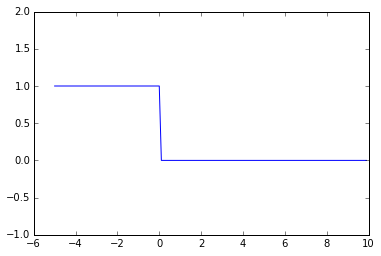

In [22]:
%matplotlib inline

from matplotlib import pyplot as plt

def zero_one_loss(z):
    return 0 if z >= 0 else 1

n = 20
z = np.arange(-5, 10, .1)
g = plt.plot(z, map(zero_one_loss, z))
plt.ylim([-1, 2])

# Approximate loss

* Need for convexity
* Between various possibilities, *log loss*

$$ \ell_{\log}(z) = \log \left( 1 + \mathrm e^{-z} \right) $$

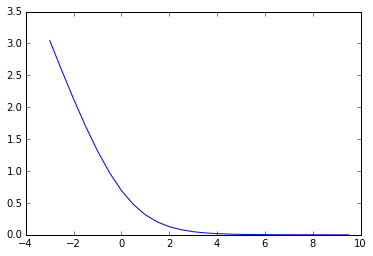

In [17]:
import numpy as np

def log_loss(z):
    return np.log(1 + np.exp(-z))

z = np.arange(-3, 10, .5)
g = plt.plot(z, map(log_loss, z))


# Result: logistic regression

$$ w = \arg \min_w \sum_{j=1}^n \ell_{\log}\left(y^{(j) w x^{(i)}} \right) $$

Thus we are optimizing

$$ f(w) = \sum_{j=1}^n \ell_{\log}\left(y^{(j) w x^{(i)}} \right) $$

* Optimization through gradient descent

$$ w_{t+1} = w_t - \eta \nabla f(w) $$

# Computing derivatives

As

$$ \frac{\partial \ell_{\log(z)}}{\partial z} =
   \frac{-\mathrm e^{-z}}{1 + \mathrm e^{-z}} =
   -\left( 1 - \frac{1}{1 + \mathrm e^{-z}} \right) $$

We have

\begin{align}
\frac{\partial f}{\partial w_k} &=
\sum_{j=1}^n \left[ 1- \frac{1}{1+ \mathrm e^{ -y^{(j)} w x^{(j)} } } \right] \left( -y^{(j)} x^{(j)_k} \right)
\end{align}

Thus

\begin{align}
\frac{\partial f}{\partial w} &=
\sum_{j=1}^n \left( 1- \frac{1}{1+ \mathrm e^{ -y^{(j)} w x^{(j)} } } \right) \left( -y^{(j)} x^{(j)} \right)
\end{align}

# Regularized logistic regression

As in ridge regression, add a regularization term

$$ \min_w \sum_{j=1}^n \ell_{\log}\left(y^{(j) w x^{(i)}} \right) + \lambda || w ||_2^2 $$

# Probabilistic interpretation

* A step ahead, instead of predicting class for an object $x$...
* ...estimate the probability of a class *given* the object

$$\mathrm P(Y=1 | X=x) $$

# Probabilistic interpretation

* Can't use linear regression: $\mathrm P(Y=1 | X=x) \neq wx$
  - because probabilities belong to $[0, 1]$
* Can't use sign: $\mathrm P(Y=1 | X=x) \neq \mathrm{sign}(wx)$
  - for same resaon of before
* Can use logistic function: $\mathrm P(Y=1 | X=x) = \sigma(wx)$

# Logistic function

$$ \sigma(z) = \frac{1}{1 + \mathrm e^{-z}} $$

kinda of smooth approximation of a step function

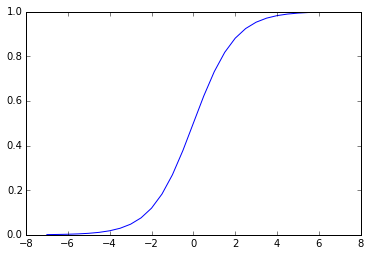

In [18]:
def logistic(z):
    return 1. / (1 + np.exp(-z))

z = np.arange(-7, 7, .5)
g = plt.plot(z, map(logistic, z))

# Predicting probabilities

1. Use logistic regression to learn $w$
2. Predict probabilities as $\mathrm P(Y=1 | X=x) = \sigma(wx)$

# Classifying using probabilities

Threshold probability: $x$ is positive if $\mathrm P(Y=1 | X=x) > 0.5$

# Choosing threshold: ROC curves

Two kind of errors:

* false positives (FP): objects classified as positive when they are negative
* false negatives (FN): objects classified as negative when they are positive

$$ \mathrm{TPR} = \frac{TP}{TP+FN}, \quad \mathrm{FPR} = \frac{FP}{FP+TN}$$

# Choosing threshold: ROC curves

* threshold = 0: everything is positive, FN=TN=0
* threshold = 1: everything is negative, FP=TP=0

![ROC curve](img/roc.png)